# Filtering Data Exercise
Answer the following questions using the `bestsellers.csv` dataset

In [1]:
import pandas as pd
books = pd.read_csv("data/bestsellers.csv")
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [2]:
#Find the books written by Pete Souza
books[books.Author == "Pete Souza"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
244,Obama: An Intimate Portrait,Pete Souza,4.9,3192,22,2017,Non Fiction


In [3]:
# Find the books that are under 10 dollars
books[books["Price"] < 10]

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [4]:
#Find the books that have a price between 50 and 60 dollars
books[books["Price"].between(50, 60)]
# longer option, for reference: books[(books["Price"] > 50) & (books["Price"] < 60)]

,Name,Author,User Rating,Reviews,Price,Year,Genre
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction


In [5]:
#Find all the books written by Kristin Hannah, Andy Weir, or Delia Owens
'''
hannah = books["Author"] == "Kristin Hannah"
weir = books["Author"] == "Andy Weir"
owens = books["Author"] == "Delia Owens"
books[hannah | weir | owens]
'''
books[books["Author"].isin(["Kristin Hannah", "Andy Weir", "Delia Owens"])] # better option for this example

,Name,Author,User Rating,Reviews,Price,Year,Genre
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2015,Fiction
438,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2016,Fiction
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [12]:
#Find the Non Fiction books that are rated 4.9
books[(books["Genre"] == "Non Fiction") & (books["User Rating"] == 4.9)]

,Name,Author,User Rating,Reviews,Price,Year,Genre
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2012,Non Fiction
189,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2013,Non Fiction
190,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2014,Non Fiction
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2015,Non Fiction
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2016,Non Fiction
244,Obama: An Intimate Portrait,Pete Souza,4.9,3192,22,2017,Non Fiction
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction


In [9]:
#Find the fiction book with the lowest User Rating
books[books["Genre"] == "Fiction"].sort_values("User Rating").head(1)

,Name,Author,User Rating,Reviews,Price,Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


In [10]:
#Find 2012's top 5 Fiction books with the most Reviews
'''
target_year = books["Year"] == 2012
target_genre = books["Genre"] == "Fiction"
books[target_year & target_genre].sort_values(["Reviews"], ascending=False)
'''

df = books[(books["Year"] == 2012) & (books["Genre"] == "Fiction")] # using the variable as the line would be too long
df.sort_values("Reviews", ascending=False).head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
409,The Hunger Games (Book 1),Suzanne Collins,4.7,32122,8,2012,Fiction
238,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2012,Fiction


<Axes: xlabel='Author'>

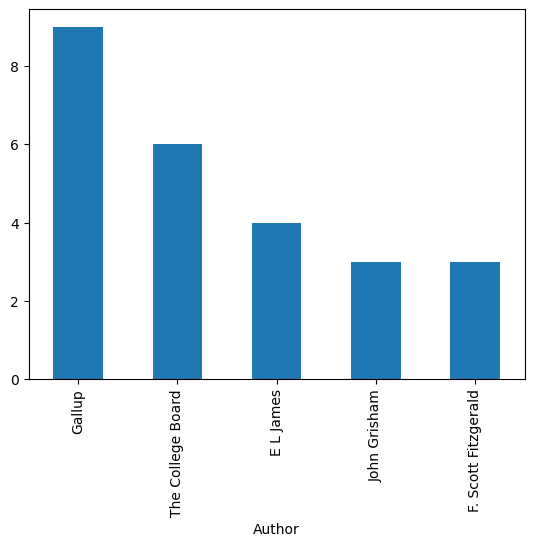

In [11]:
#Create a bar plot showing the 5 authors who have the most books with a rating under 4.5
# books[books["User Rating"] < 4.5].Author.value_counts().head(5).plot(kind="bar")

low_rated = books[books["User Rating"] < 4.5]
low_rated["Author"].value_counts().head().plot(kind="bar")